In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
periods_train = pd.read_csv('../data/periods_train.csv', parse_dates=["activation_date", "date_from", "date_to"])
periods_test = pd.read_csv('../data/periods_test.csv', parse_dates=["activation_date", "date_from", "date_to"])

In [8]:
train.head(1)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   item_id               1503424 non-null  object 
 1   user_id               1503424 non-null  object 
 2   region                1503424 non-null  object 
 3   city                  1503424 non-null  object 
 4   parent_category_name  1503424 non-null  object 
 5   category_name         1503424 non-null  object 
 6   param_1               1441848 non-null  object 
 7   param_2               848882 non-null   object 
 8   param_3               640859 non-null   object 
 9   title                 1503424 non-null  object 
 10  description           1387148 non-null  object 
 11  price                 1418062 non-null  float64
 12  item_seq_number       1503424 non-null  int64  
 13  activation_date       1503424 non-null  object 
 14  user_type             1503424 non-

In [13]:
train.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


In [9]:
test.head(1)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   item_id               508438 non-null  object 
 1   user_id               508438 non-null  object 
 2   region                508438 non-null  object 
 3   city                  508438 non-null  object 
 4   parent_category_name  508438 non-null  object 
 5   category_name         508438 non-null  object 
 6   param_1               485528 non-null  object 
 7   param_2               275209 non-null  object 
 8   param_3               202107 non-null  object 
 9   title                 508438 non-null  object 
 10  description           508438 non-null  object 
 11  price                 477853 non-null  float64
 12  item_seq_number       508438 non-null  int64  
 13  activation_date       508438 non-null  object 
 14  user_type             508438 non-null  object 
 15  

In [15]:
test.describe()

,price,item_seq_number,image_top_1
count,4.778530e+05,508438.000000,465829.000000
mean,2.798189e+05,825.132150,1297.959228
std,5.364218e+06,5646.868618,961.065300
min,0.000000e+00,1.000000,0.000000
25%,5.000000e+02,8.000000,467.000000
50%,1.500000e+03,30.000000,1132.000000
75%,8.600000e+03,94.000000,2218.000000
max,3.000060e+09,205064.000000,3066.000000


In [10]:
periods_train.head(1)

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16


In [16]:
periods_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16687412 entries, 0 to 16687411
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   item_id          object        
 1   activation_date  datetime64[ns]
 2   date_from        datetime64[ns]
 3   date_to          datetime64[ns]
dtypes: datetime64[ns](3), object(1)
memory usage: 509.3+ MB


In [11]:
periods_test.head(1)

,item_id,activation_date,date_from,date_to
0,f3a62a713278,2017-03-13,2017-04-12,2017-04-12


In [18]:
periods_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16687412 entries, 0 to 16687411
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   item_id          object        
 1   activation_date  datetime64[ns]
 2   date_from        datetime64[ns]
 3   date_to          datetime64[ns]
dtypes: datetime64[ns](3), object(1)
memory usage: 509.3+ MB


In [4]:
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)
print("Size of periods train shape:", periods_train.shape)
print("Size of periods test shape:", periods_test.shape)

Train shape:  (1503424, 18)
Test shape:  (508438, 17)
Size of periods train shape: (16687412, 4)
Size of periods test shape: (13724922, 4)


Доля и количество NaN значений

In [45]:
pd.concat([(100.0 * train.isna().sum() / train.shape[0]).sort_values(ascending = False), train.isna().sum().sort_values(ascending = False)], axis=1, keys=['Доля NaN', 'Количество NaN'])

,Доля NaN,Количество NaN
param_3,57.373369,862565
param_2,43.536753,654542
description,7.734079,116276
image_top_1,7.488772,112588
image,7.488772,112588
price,5.677839,85362
param_1,4.095718,61576
item_id,0.000000,0
user_type,0.000000,0
activation_date,0.000000,0


In [46]:
pd.concat([(100.0 * periods_train.isna().sum() / periods_train.shape[0]).sort_values(ascending = False), periods_train.isna().sum().sort_values(ascending = False)], axis=1, keys=['Доля NaN', 'Количество NaN'])

,Доля NaN,Количество NaN
activation_date,0.034697,5790
item_id,0.000000,0
date_from,0.000000,0
date_to,0.000000,0


Уникальные значения

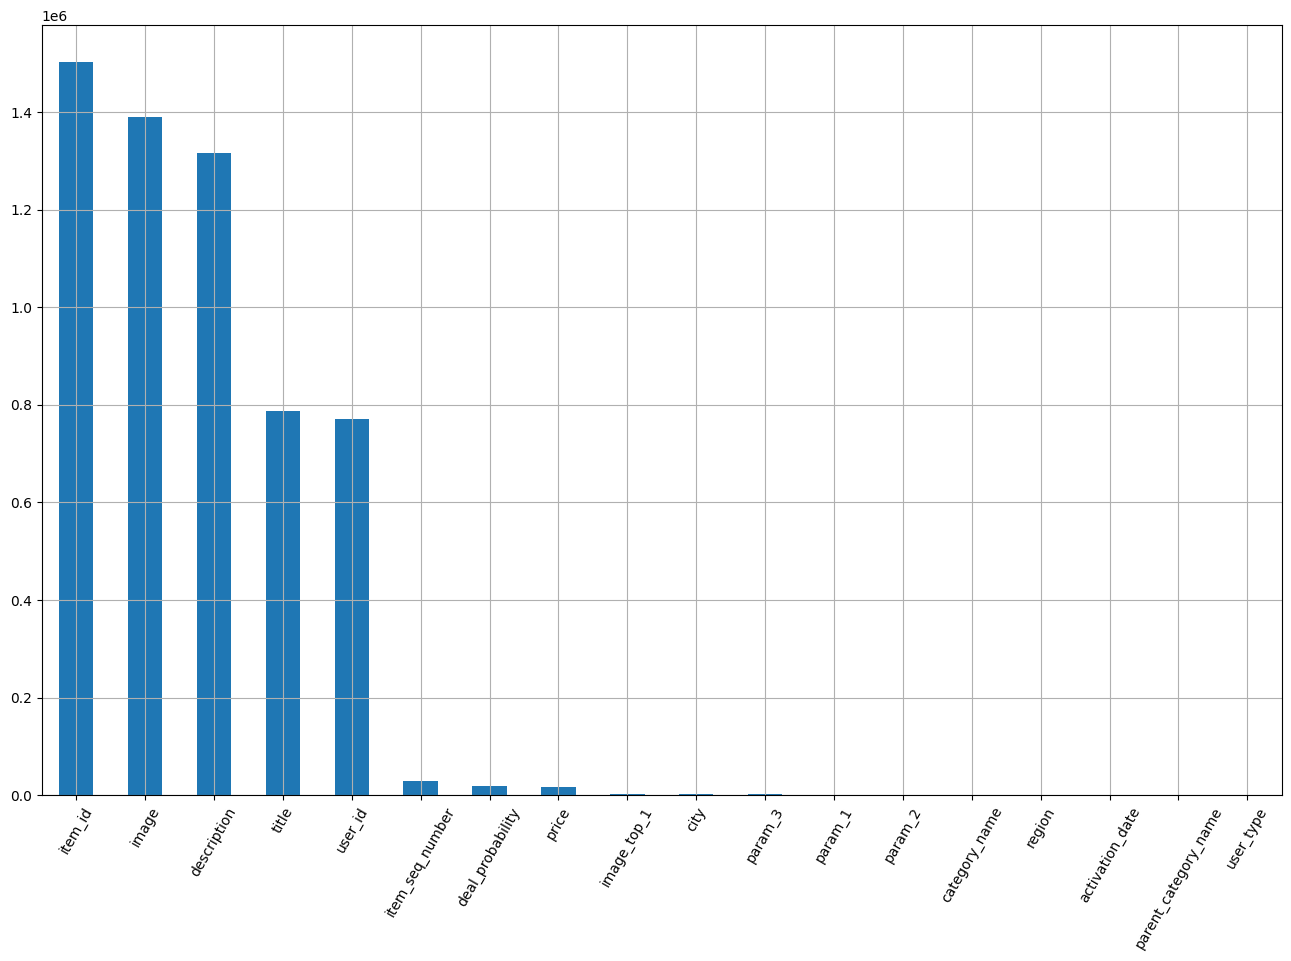

In [36]:
plt.figure(figsize=(16, 10))
train.nunique().sort_values(ascending = False).plot(kind='bar',grid=True)
plt.xticks(rotation=60)
plt.show()

In [47]:
pd.concat([(100.0 * train.nunique() / train.shape[0]).sort_values(ascending = False), train.nunique().sort_values(ascending = False).sort_values(ascending = False)], axis=1, keys=['Доля уникальных значений', 'Количество уникальных значений'])

,Доля уникальных значений,Количество уникальных значений
item_id,100.000000,1503424
image,92.511228,1390836
description,87.606823,1317102
title,52.438766,788377
user_id,51.334088,771769
item_seq_number,1.877847,28232
deal_probability,1.224339,18407
price,1.131151,17006
image_top_1,0.203668,3062
city,0.115270,1733


Распределение вероятности продажи (deal_probability)

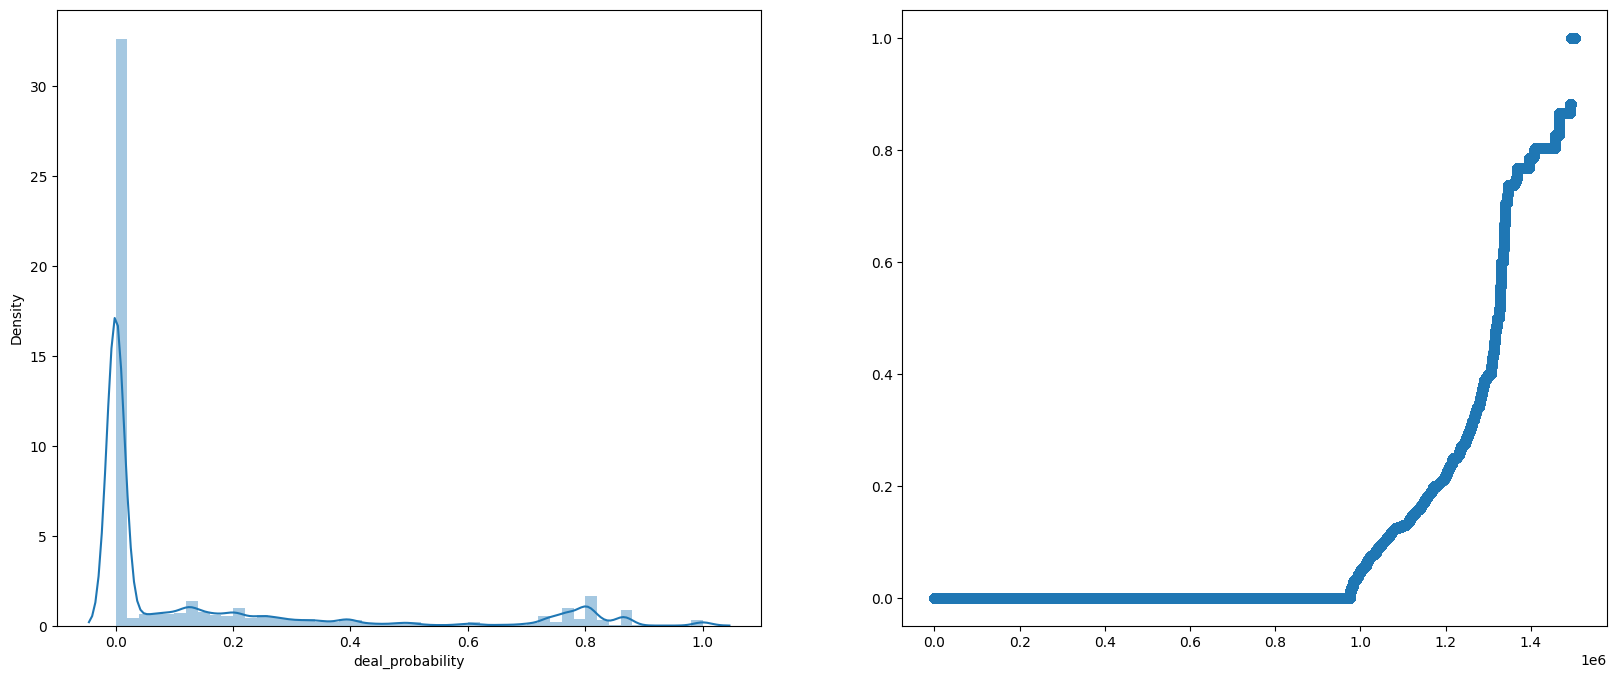

In [73]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
sns.distplot(train['deal_probability'])
plt.subplot(1,2,2)
plt.scatter(range(train.shape[0]), np.sort(train.deal_probability.values))
plt.show()

Распределение региона

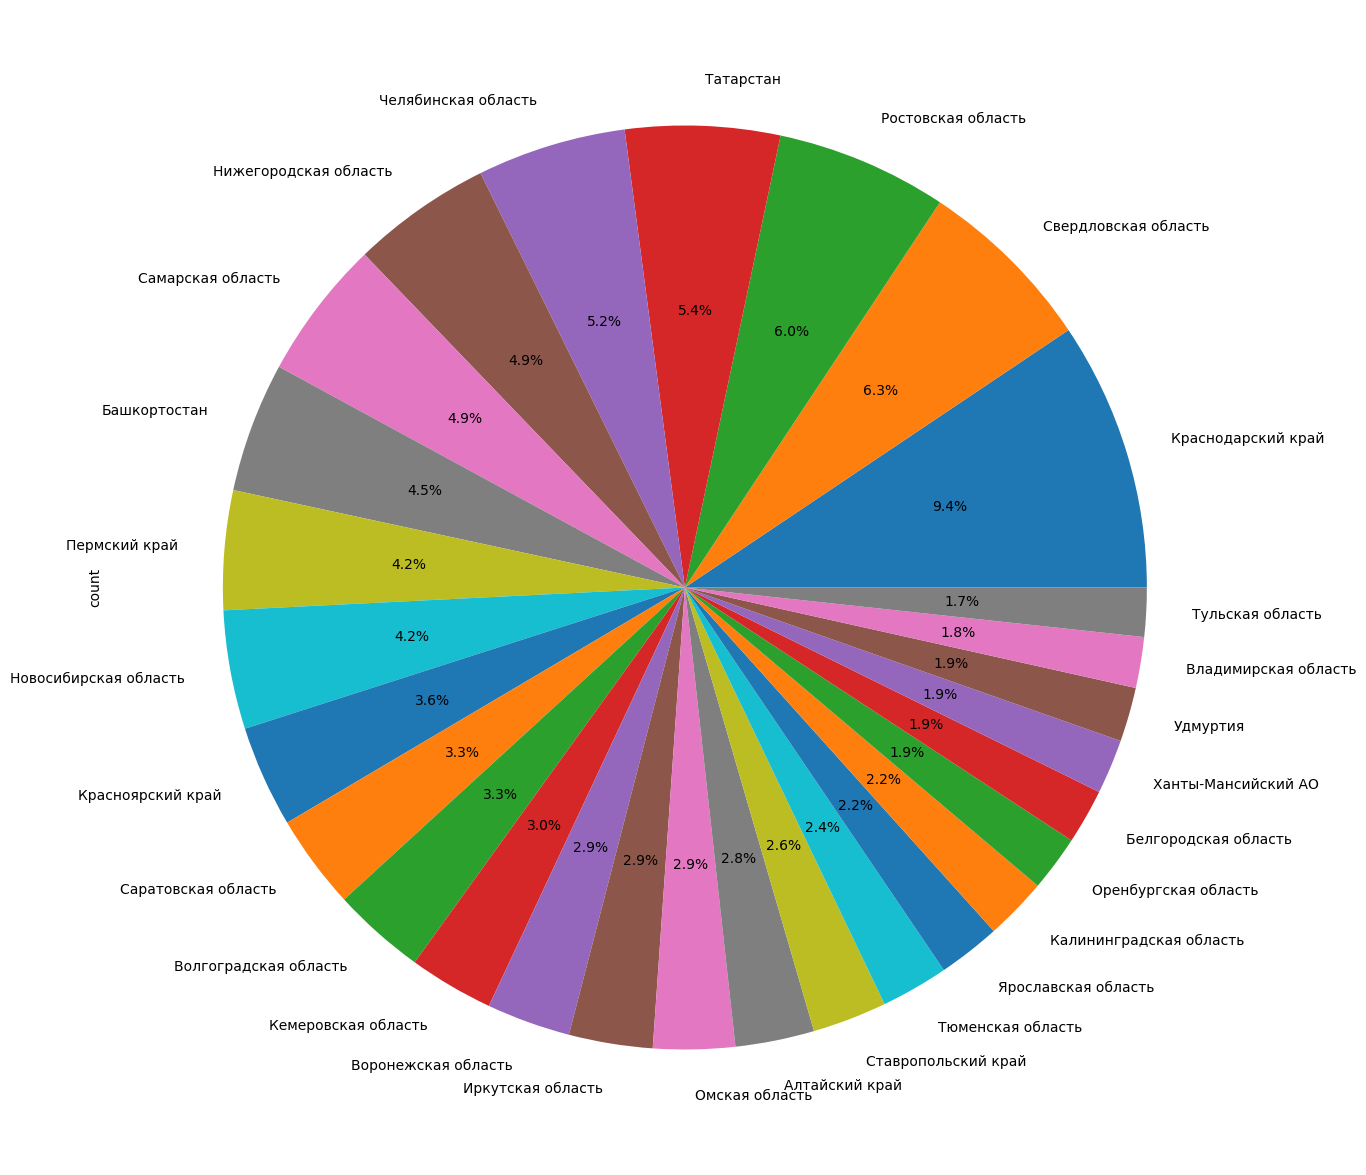

In [91]:
plt.figure(figsize=(20, 15))
train.region.value_counts().sort_values(ascending = False).plot(kind='pie', autopct='%.1f%%')
plt.show()

Распределение города (топ 30)

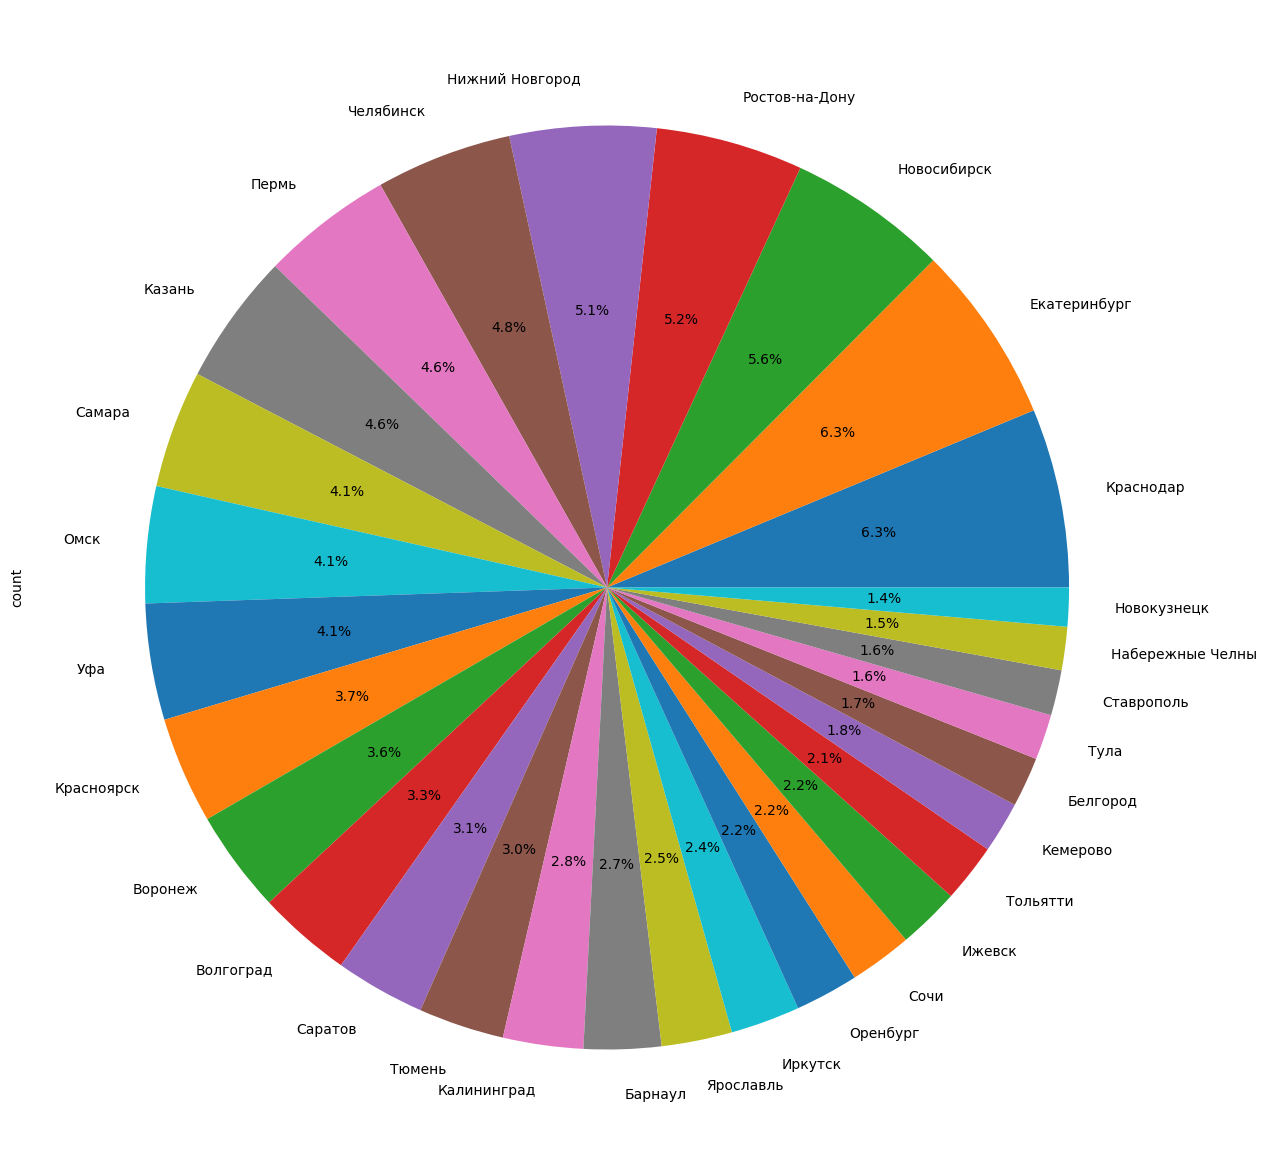

In [95]:
plt.figure(figsize=(20, 15))
train.city.value_counts().sort_values(ascending = False)[0:30].plot(kind='pie', autopct='%.1f%%')
plt.show()

Распределение цен

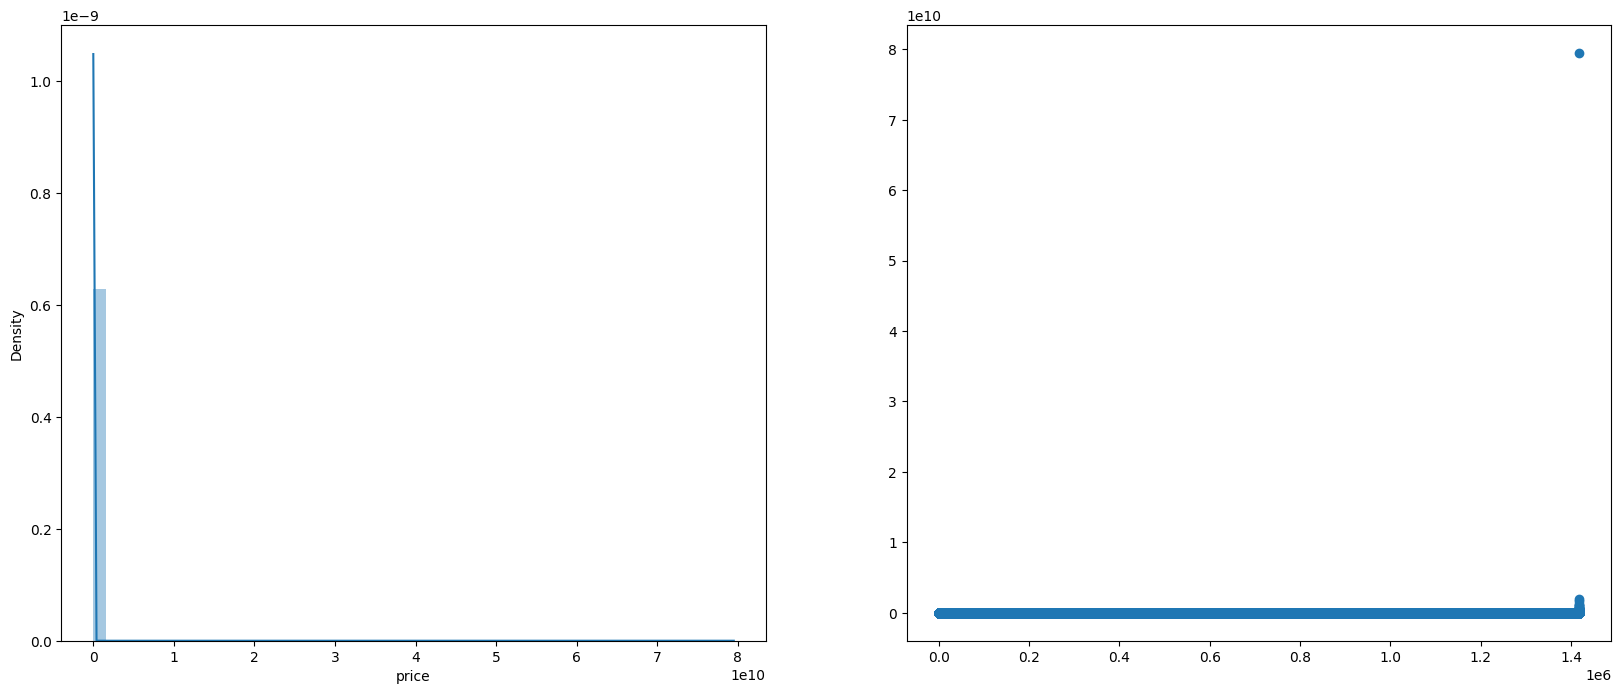

In [3]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
sns.distplot(train['price'])
plt.subplot(1,2,2)
plt.scatter(range(train.shape[0]), np.sort(train.price.values))
plt.show()

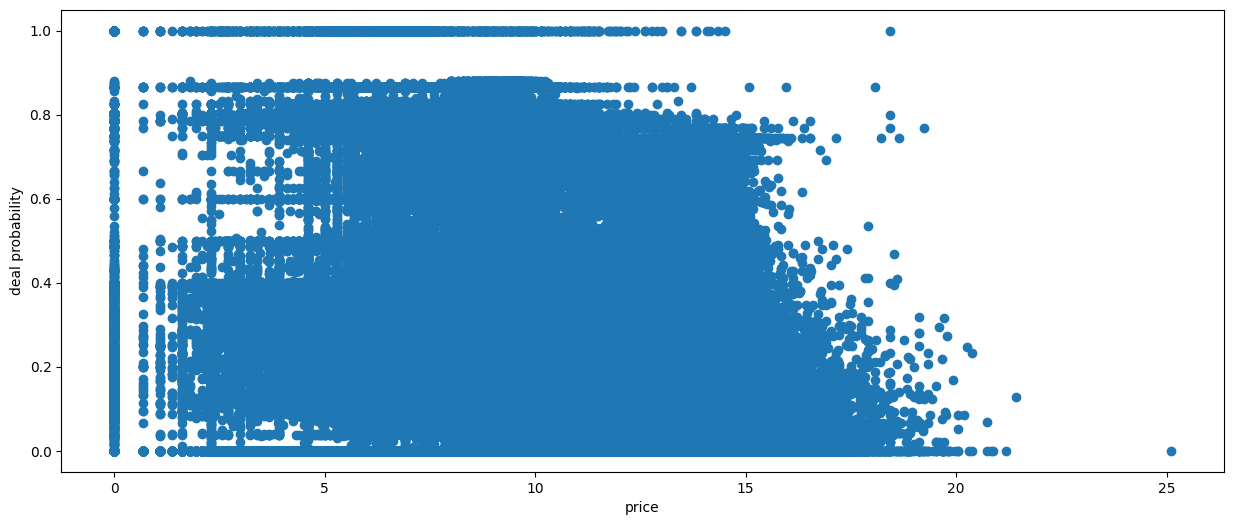

In [22]:
plt.figure(figsize=(15,6))
plt.scatter(np.log(train.price), train.deal_probability)
plt.xlabel('price')
plt.ylabel('deal probability')
plt.show()

Распределение типов профилей

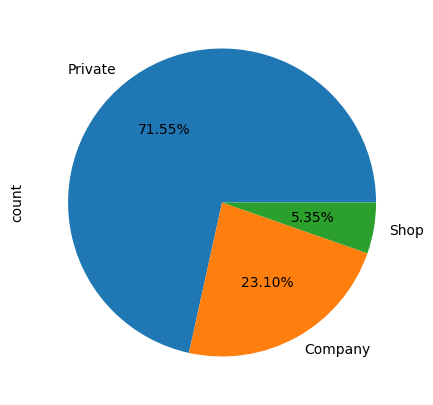

In [6]:
plt.figure(figsize=(7, 5))
train.user_type.value_counts().sort_values(ascending = False).plot(kind='pie', autopct='%.2f%%')
plt.show()

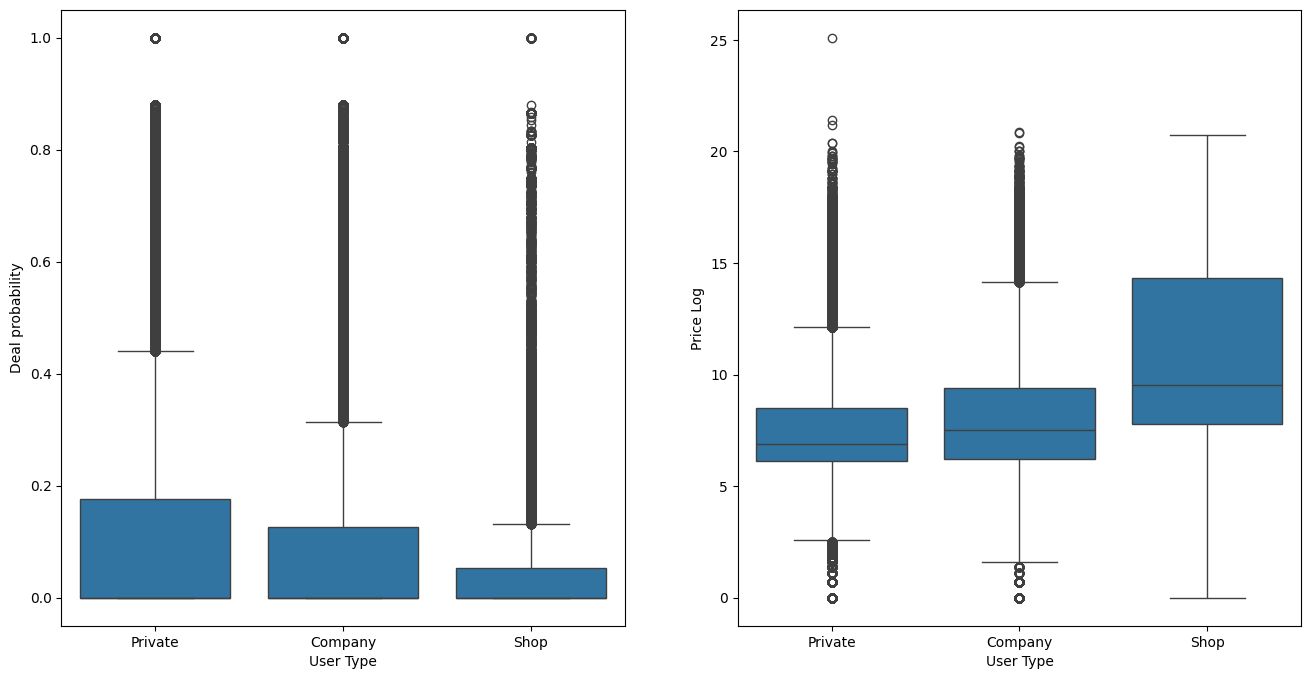

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train['price_log'] = np.log(train['price'] + 1)

plot = sns.boxplot(x='user_type', y='deal_probability', data=train)
plot.set_xlabel('User Type')
plot.set_ylabel('Deal probability')

plt.subplot(1,2,2)
plot = sns.boxplot(x='user_type', y='price_log', data=train)
plot.set_xlabel('User Type')
plot.set_ylabel('Price Log')
plt.show()

Топ 10 названий

In [13]:
pd.DataFrame(train.title.value_counts().sort_values(ascending = False)[0:10])

,count
title,
Платье,15550
Туфли,6334
Куртка,6331
Пальто,5251
Джинсы,4758
Комбинезон,4506
Кроссовки,3196
Костюм,2916
Ботинки,2876


Работа с датой

In [3]:
train['activation_date'] = pd.to_datetime(train['activation_date'])
test['activation_date'] = pd.to_datetime(test['activation_date'])

train["day"] = train['activation_date'].dt.day
train["month"] = train["activation_date"].dt.month
train['weekday'] = train['activation_date'].dt.weekday
train["dayofyear"] = train['activation_date'].dt.dayofyear

test["day"] = test['activation_date'].dt.day
test["month"] = test["activation_date"].dt.month
test['month'] = test['activation_date'].dt.weekday
test["dayofyear"] = test['activation_date'].dt.dayofyear 

In [ ]:
plt.figure(figsize=(16, 10))
train.nunique().sort_values(ascending = False).plot(kind='bar',grid=True)
plt.xticks(rotation=60)
plt.show()

In [5]:
train.month.value_counts()

month
3    1503415
4          9
Name: count, dtype: int64

<Axes: xlabel='day'>

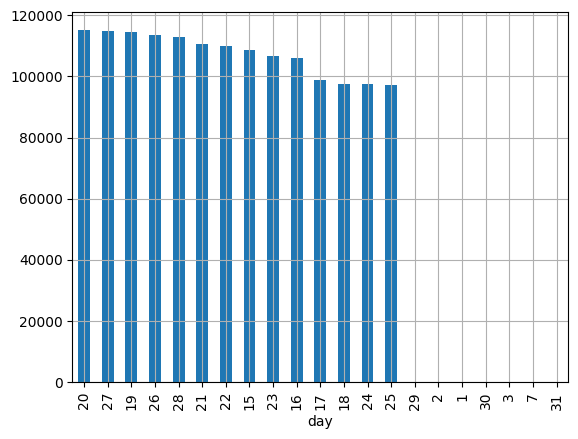

In [7]:
train.day.value_counts().plot(kind='bar',grid=True)

<Axes: ylabel='count'>

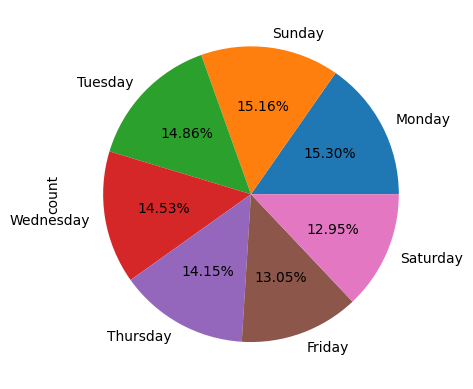

In [18]:
train.weekday.apply(lambda x : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][x]).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: xlabel='dayofyear'>

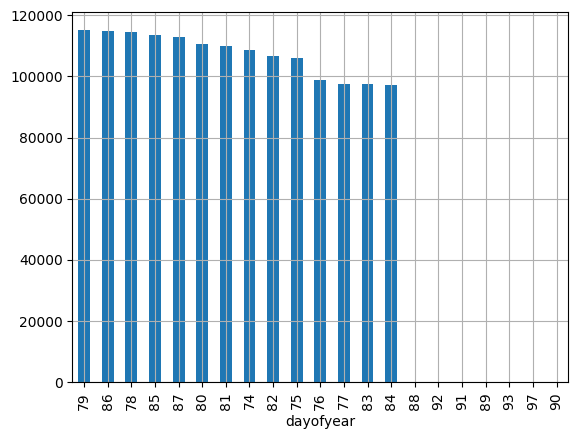

In [19]:
train.dayofyear.value_counts().plot(kind='bar',grid=True)

In [20]:
periods_train['total_days'] = periods_train['date_to'] - periods_train['date_from']
periods_test['total_days'] = periods_test['date_to'] - periods_test['date_from']

<Axes: xlabel='total_days'>

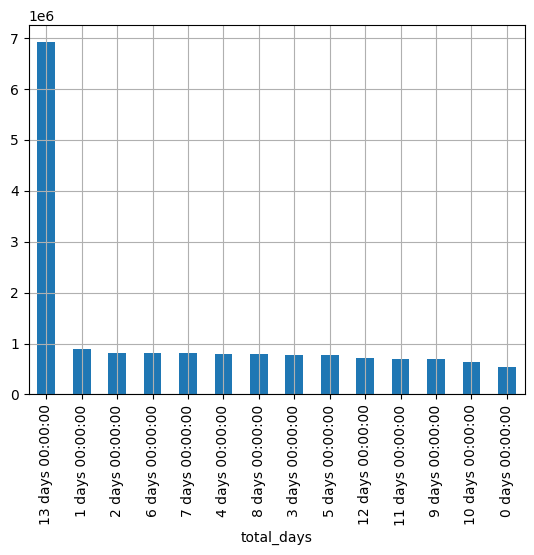

In [21]:
periods_train.total_days.value_counts().plot(kind='bar',grid=True)